# Supervised Machine Learning Classification Problem : Credit Card Fraud detection

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
di = pd.read_csv('/Users/barnalikkapradhan/Downloads/x/fraudTrain.csv',index_col=0,parse_dates=['trans_date_trans_time', 'dob'])
di.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
mi = pd.read_csv('/Users/barnalikkapradhan/Downloads/x/fraudTest.csv',index_col=0,parse_dates=['trans_date_trans_time', 'dob'])
mi.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
# Join the test & train datasets
credit_card = pd.concat((di,mi),ignore_index= True)


In [5]:
# Print first 5 rows of the dataset
credit_card.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
# Print last 5 rows of the dataset
credit_card.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [7]:
# Get information about different types of column
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [8]:
# To see the presence of null values
credit_card.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
# To calculate the age from the given Date of Birth
credit_card['age'] = np.rint((pd.to_datetime('now') - credit_card['dob']) / np.timedelta64(1, 'Y'))
credit_card.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,44.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,60.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36.0


## Detecting the Outliers

In [10]:
# Using the modified z-score,to detect the outlier for the variable amount transacted by the credit card holder.
def get_mad(s):
    median = np.median(s)
    diff = abs(s-median)
    MAD = np.median(diff)
    return MAD


MAD = get_mad(credit_card.amt)
median = np.median(credit_card.amt)
MAD, median

def get_modified_z_score(x, median, MAD):
    return 0.6745*(x-median)/MAD



In [11]:
# fitting the formula of the modified z-score,to see that values greater then 2 can be labelled as potential outliers, so all the normal values get retained in the datset while the outliers are removed. 
credit_card['mod_z_score'] = credit_card.amt.apply(lambda x: get_modified_z_score(x, median, MAD))
credit_card_cleaned = credit_card[credit_card.mod_z_score<2]
credit_card_cleaned.head(30)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,mod_z_score
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34.0,-0.764889
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,44.0,1.076391
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55.0,-0.044114
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36.0,-0.098852
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,61.0,0.849517
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,29.0,-0.052397
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,75.0,0.435742
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,81.0,-0.777494
10,2019-01-01 00:06:23,4642894980163,fraud_Rutherford-Mertz,grocery_pos,24.74,Eddie,Mendez,M,1831 Faith View Suite 653,Clarinda,...,7297,IT trainer,1990-07-13,d71c95ab6b7356dd74389d41df429c87,1325376383,40.275891,-96.011548,0,32.0,-0.408913
11,2019-01-01 00:06:53,377234009633447,fraud_Kerluke-Abshire,shopping_net,7.77,Theresa,Blackwell,F,43576 Kristina Islands,Shenandoah Junction,...,1925,Systems developer,1966-02-14,3c74776e558f1499a7824b556e474b1d,1325376413,40.103866,-78.624459,0,56.0,-0.714473


In [12]:
# to see the original rows & columns of a dataset
credit_card.shape

(1852394, 24)

In [16]:
# to see the number of normal transaction indicated by 0 & no of fraud transactions indicated by 1
credit_card['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [13]:
# to see the rows & columns of a dataset after outlier has been removed.
credit_card_cleaned.shape

(1714606, 24)

## Detecting Outliers

In the original dataframe, we see that their is presence of outliers and we know that the data is not normally distributed. While the second boxplot represents the amount transacted after removing the outliers, we see that the maximum no of normal transactions is $160, while the fraudulent transactions still show presence of outliers at the higher end.

<AxesSubplot:xlabel='is_fraud', ylabel='amt'>

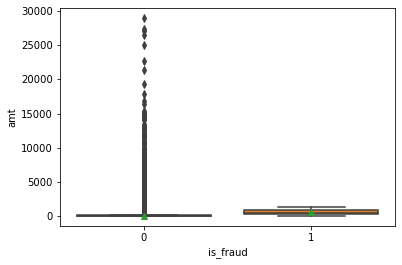

In [20]:
#Creating a boxplot to see the comparison of normal vs fraud, in case of amount being transacted in the orginal dataframe.
sns.boxplot(x='is_fraud',y='amt',data= credit_card,showmeans=True)

<AxesSubplot:xlabel='is_fraud', ylabel='amt'>

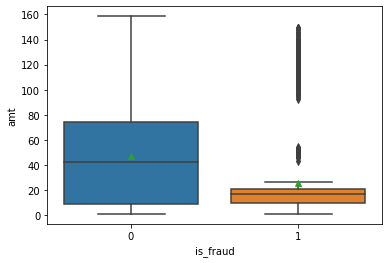

In [21]:
#Creating a boxplot to see the comparison of normal vs fraud, in case of amount being transacted after the removal of the outliers.
sns.boxplot(x='is_fraud',y='amt',data= credit_card_cleaned,showmeans=True)

# Visualizing the Data

In [14]:
import plotly.express as px
import geopandas as gpd
import geopandas


In [15]:
# Putting the longitude & latitude of the credit card holder as well as the merchants into a geometry point within respective dataframes. 
gdf = gpd.GeoDataFrame(
    credit_card_cleaned, geometry=geopandas.points_from_xy(credit_card_cleaned.long, credit_card_cleaned.lat))
gkd = gpd.GeoDataFrame(
    credit_card_cleaned, geometry=geopandas.points_from_xy(credit_card_cleaned.merch_long, credit_card_cleaned.merch_lat))


In [16]:
# Using the basemap provided with geopandas, specifically filtering North America.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world_filtered = world[world.continent == "North America"]

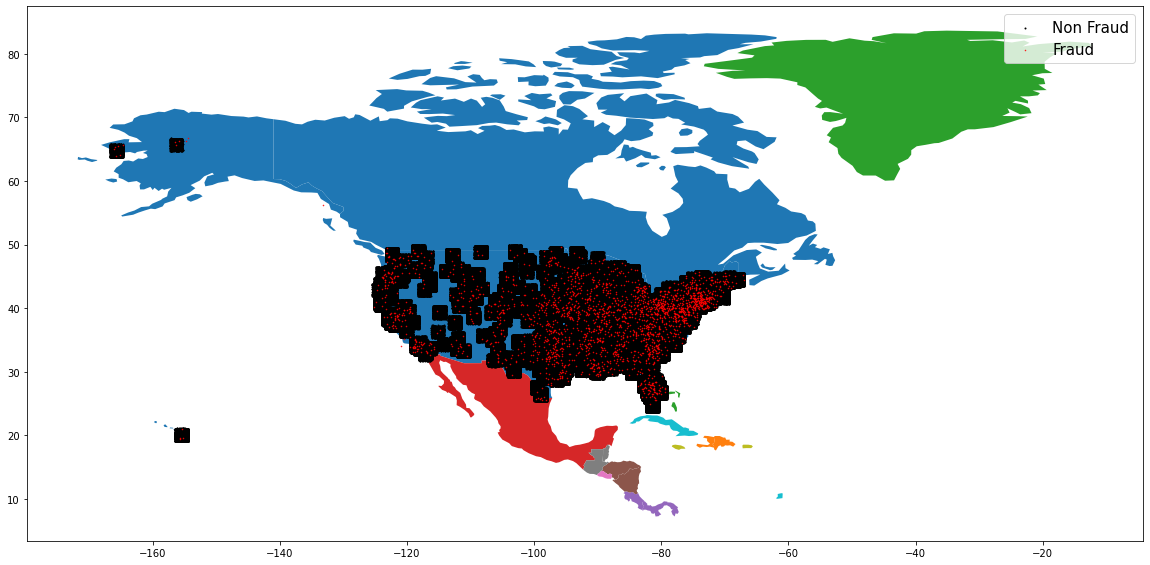

In [17]:
# Plotting the normal and fradulent transactions for credit card holders on the map
fig,ax = plt.subplots (figsize = (20,20) )
world_filtered.plot(ax=ax, cmap='tab10')

gdf[gdf['is_fraud'] == 0].plot (ax = ax, color = "black" , marker = "o", label="Non Fraud",markersize=1)
gdf[gdf['is_fraud'] == 1].plot(ax = ax, color = "red", marker = ".", label ="Fraud",markersize=1)

plt. legend (prop={'size': 15})
plt.show()

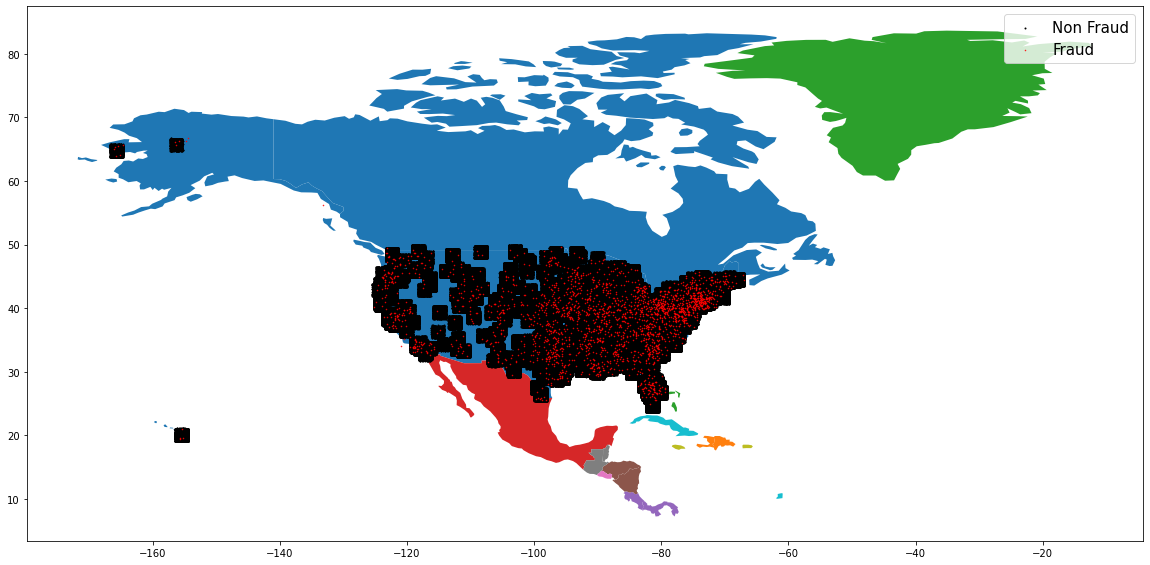

In [18]:
# Plotting the normal and fradulent transactions for the merchants on the map
fig,ax = plt.subplots (figsize = (20,20) )
world_filtered.plot(ax=ax, cmap='tab10')

gkd[gkd['is_fraud'] == 0].plot (ax = ax, color = "black" , marker = "o", label="Non Fraud",markersize=1)
gkd[gkd['is_fraud'] == 1].plot(ax = ax, color = "red", marker = ".", label ="Fraud",markersize=1)

plt. legend (prop={'size': 15})
plt.show()

Through the figure plotted by importing the map of United States, we see that fraudulent transaction of the credit card holders as well as the merchants, are widely present in states of US, with comparitively higher fraudulent transactions in most of the states given the exception of lower fraudulent transactions taking place in Alaska and Honolulu.

In [21]:
# Use the else if function to classify the hours according to the time period.
def time_of_day(X):
    if X in range(6,12):
        return 'Morning'
    elif X in range(12,16):
        return 'Afternoon'
    elif X in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [22]:
# Using the hour function to extract the hours from the transaction_date_transaction_time variable & apply the time range classifier.  
credit_card_cleaned['time of the day']=credit_card_cleaned['trans_date_trans_time'].dt.hour.apply(time_of_day)

Here we can see that fraudulent transactions is higher at late night as compared to other time periods.

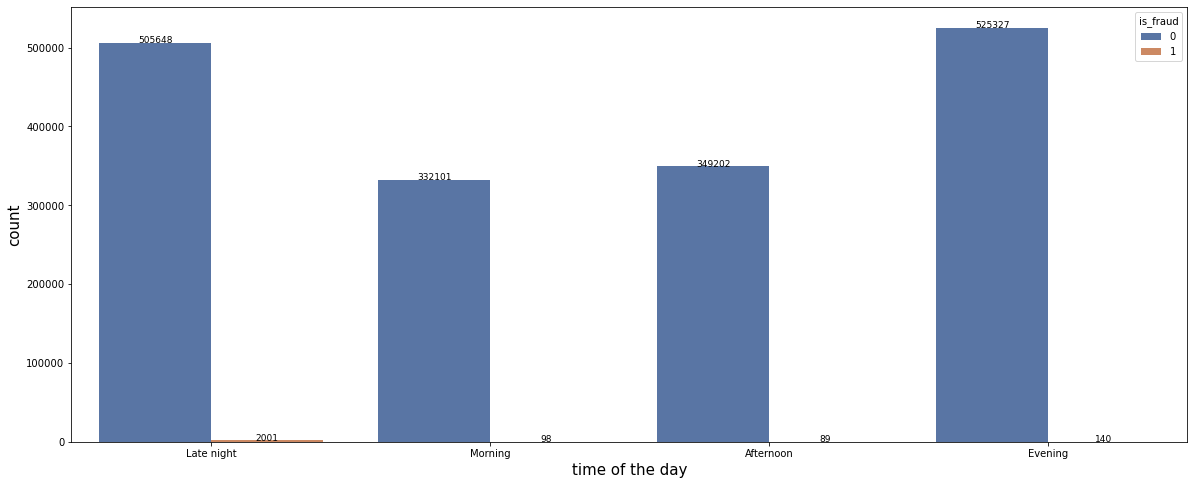

In [23]:
# Put the hours categorized into time frames into a countplot.
countplt, ax = plt.subplots(figsize = (20,8))
ax =sns.countplot(x = 'time of the day', data=credit_card_cleaned,palette='deep', hue='is_fraud')
ax.set_xlabel('time of the day', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 9)


In [24]:
# Using the month name function to extract the total months from the transaction_date_transaction_time variable.
credit_card_cleaned['time of the month']=credit_card_cleaned['trans_date_trans_time'].dt.month_name()

Here we see that fraudulent transaction is highest for the month of March, January, May, June,August & October.  

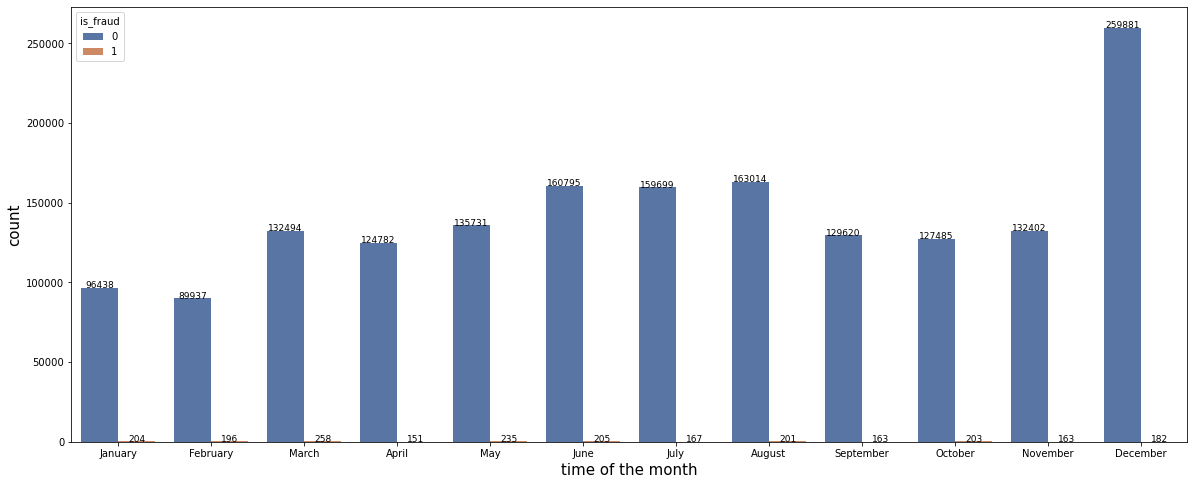

In [25]:
# Put the months categorized into normal & fraud transactions into a countplot.
countplt, ax = plt.subplots(figsize = (20,8))
ax =sns.countplot(x = 'time of the month', data=credit_card_cleaned,palette='deep', hue='is_fraud')
ax.set_xlabel('time of the month', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 9)


In [26]:
# Using the weekday name function to extract the weeks from the transaction_date_transaction_time variable.
credit_card_cleaned['time of the week']=credit_card_cleaned['trans_date_trans_time'].dt.day_name()

Here we see that fraudulent transaction is highest on Saturdays, while the normal transactions is highest on Mondays.

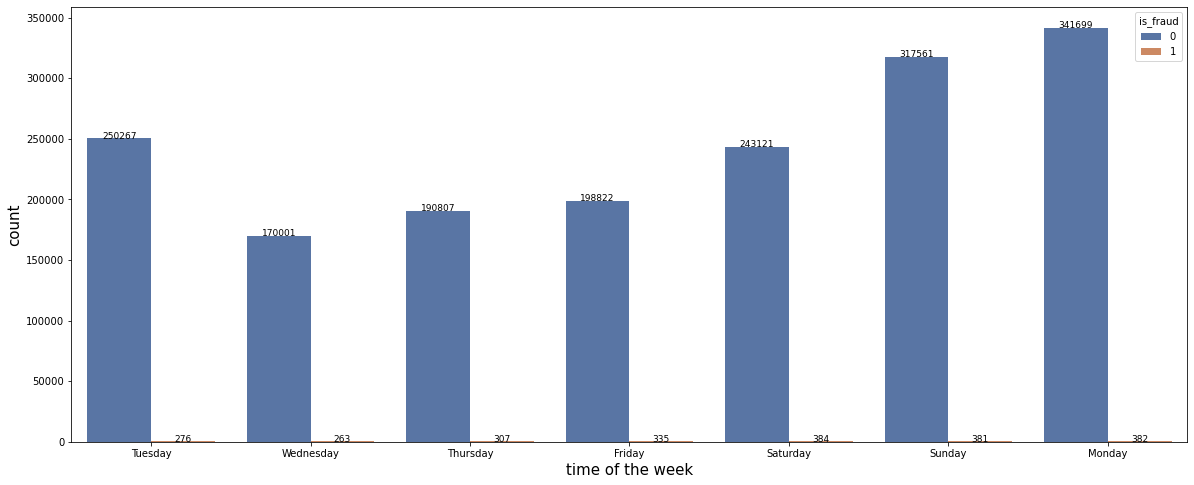

In [27]:
# Put the weekdays categorized into normal & fraud transactions into a countplot.
countplt, ax = plt.subplots(figsize = (20,8))
ax =sns.countplot(x = 'time of the week', data=credit_card_cleaned,palette='deep', hue='is_fraud')
ax.set_xlabel('time of the week', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 9)


Here we see that categories like grocery point of sale, miscellaneous net,shopping net, shopping point of sale,entertainment and home show only normal transactions, while gas transport,food dining, kids pet,personal care, health & fitness, grocery net & travel show presence of fraudulent transactions. 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


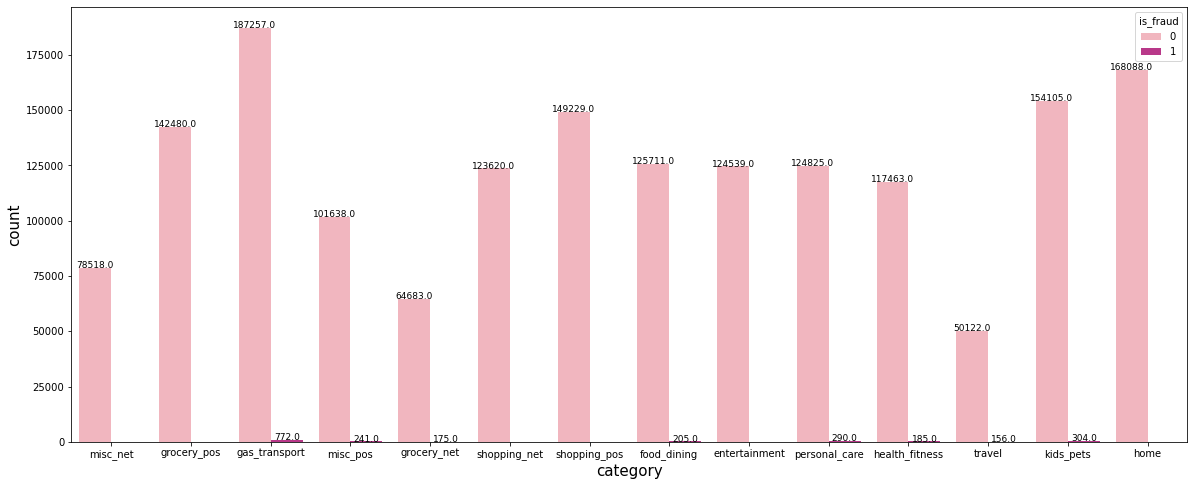

In [28]:
# Use countplot to classify different categories of merchants into normal & fradulent transactions.
countplt, ax = plt.subplots(figsize = (20,8))
ax =sns.countplot(x = 'category', data=credit_card_cleaned,palette='RdPu', hue='is_fraud')
ax.set_xlabel('category', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 9)


In [29]:
# Use the else if function to classify the age of the credit card holder.
def agee(X):
    if X in range(10,20):
        return '10-20'
    if X in range(20,30):
        return '20-30'
    if X in range(30,40):
        return '30-40'
    if X in range(40,50):
        return '40-50'
    elif X in range(50,60):
        return '50-60'
    else:
        return '60+'

In [30]:
# Put the classified age into the new variable column.
credit_card_cleaned['age_c']=credit_card['age'].apply(agee)

Here we see people 60+ years of age, show highest number of fraudulent transactions.

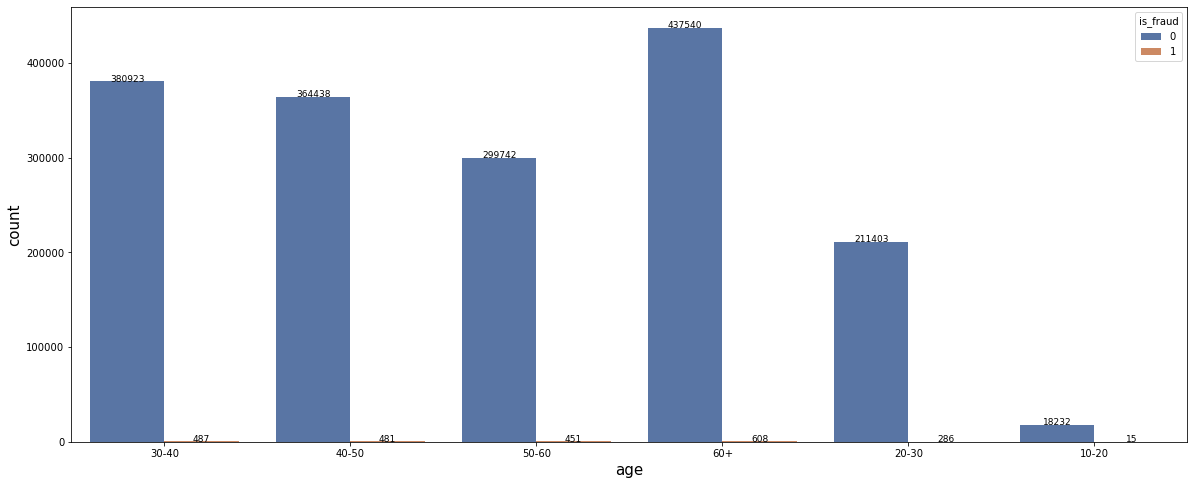

In [31]:
# Use countplot to display the age groups across normal & fradulent transactions.
countplt, ax = plt.subplots(figsize = (20,8))
ax =sns.countplot(x = 'age_c', data=credit_card_cleaned,palette='deep', hue='is_fraud')
ax.set_xlabel('age', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 9)


The fraudulent transactions is higher for females then for males.

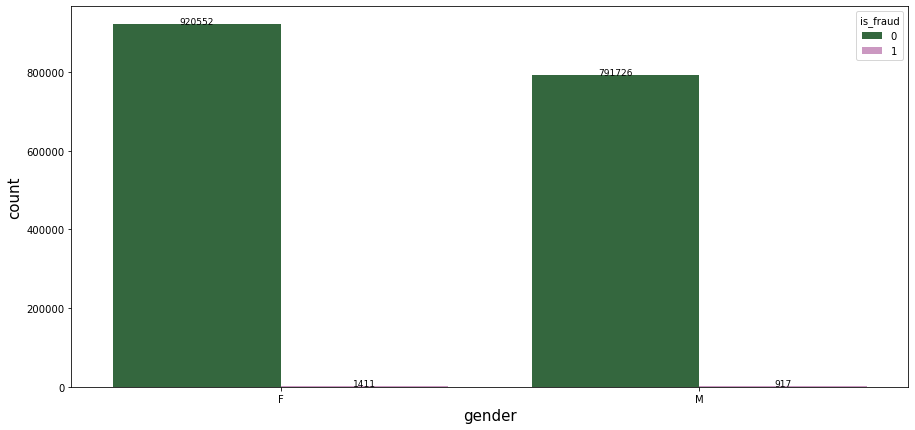

In [32]:
# Use countplot to categorize males and females into normal & fradulent transactions.
countplt, ax = plt.subplots(figsize = (15,7))
ax =sns.countplot(x = 'gender', data=credit_card_cleaned,palette='cubehelix', hue='is_fraud')
ax.set_xlabel('gender', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 9)


In [33]:
# Classify the population of the city, through quartiles into low, medium and highly populated areas.
credit_card_cleaned['density'] = pd.qcut(credit_card_cleaned['city_pop'], q=[0, .25, .75, 1], labels=['Low', 'Medium', 'High'])

The countplot below showcases the fact that it is the medium sized population that shows the highest number of fradulent transactions at large.

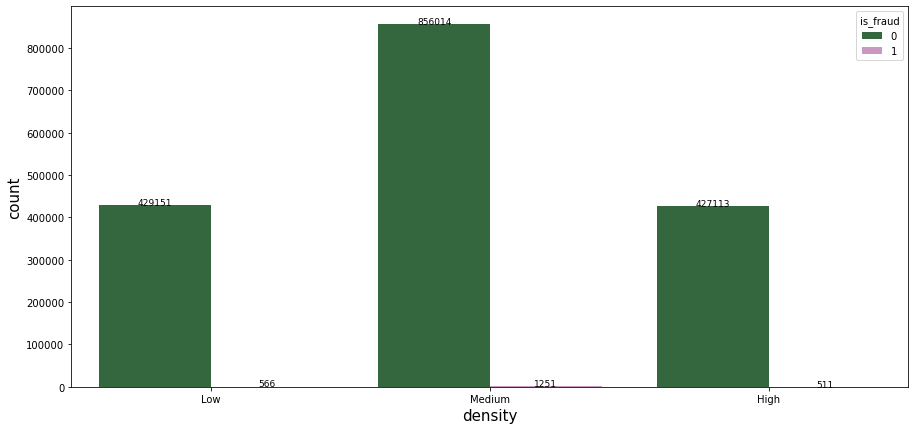

In [34]:
# Use countplot to see whihc area is showing higher number of normal/fraudulent transactions.
countplt, ax = plt.subplots(figsize = (15,7))
ax =sns.countplot(x = 'density', data=credit_card_cleaned,palette='cubehelix', hue='is_fraud')
ax.set_xlabel('density', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 9)


## Clean Data by dropping uncessary columns

In [35]:
# Dropping unecessary columns from the dataset.
final=credit_card_cleaned.drop(['trans_date_trans_time','cc_num','merchant','first','last','street','city','state','zip','lat','long','dob','trans_num','unix_time','merch_long','merch_lat','age','mod_z_score','city_pop','category','geometry'],axis=1)
final.head()

,amt,gender,job,is_fraud,time of the day,time of the month,time of the week,age_c,density
0,4.97,F,"Psychologist, counselling",0,Late night,January,Tuesday,30-40,Medium
1,107.23,F,Special educational needs teacher,0,Late night,January,Tuesday,40-50,Low
3,45.00,M,Patent attorney,0,Late night,January,Tuesday,50-60,Medium
4,41.96,M,Dance movement psychotherapist,0,Late night,January,Tuesday,30-40,Low
5,94.63,F,Transport planner,0,Late night,January,Tuesday,60+,Medium


## Encoding the Data

In [36]:
# Using RareLabelEncoder to categorise the jobs which are less in number in the dataset into a string 'Rare'.
from feature_engine.encoding import RareLabelEncoder
encoder = RareLabelEncoder(tol=0.005, n_categories=2,
                                         variables=['job'],
                                         replace_with='Rare')
encoder.fit(final)
j = encoder.transform(final)
encoder.encoder_dict_

{'job': Index(['Film/video editor', 'Exhibition designer', 'Naval architect',
        'Surveyor, land/geomatics', 'Materials engineer',
        'Designer, ceramics/pottery', 'Financial adviser', 'IT trainer',
        'Systems developer', 'Chartered public finance accountant',
        'Environmental consultant', 'Copywriter, advertising',
        'Chief Executive Officer', 'Scientist, audiological', 'Comptroller',
        'Agricultural consultant', 'Magazine features editor', 'Podiatrist'],
       dtype='object')}

In [37]:
# To provide labels in the form of numbers to the string variables. 
from sklearn.preprocessing import LabelEncoder

In [38]:
# Encoding job type strings into numbers.
lbl_encode = LabelEncoder()
lbl_encode.fit_transform(j['job'])
j['job_type']= lbl_encode.fit_transform(j['job'])
j['job'].value_counts()

Rare                                   1531469
Film/video editor                        12723
Exhibition designer                      12495
Naval architect                          11749
Surveyor, land/geomatics                 11337
Materials engineer                       11205
Designer, ceramics/pottery               10818
Financial adviser                        10408
IT trainer                                9931
Systems developer                         9870
Chartered public finance accountant       9689
Environmental consultant                  9577
Copywriter, advertising                   9248
Chief Executive Officer                   9142
Scientist, audiological                   9109
Comptroller                               9100
Agricultural consultant                   9024
Magazine features editor                  9019
Podiatrist                                8693
Name: job, dtype: int64

In [39]:
j['job_type'].value_counts()

15    1531469
8       12723
7       12495
13      11749
17      11337
12      11205
5       10818
9       10408
10       9931
18       9870
1        9689
6        9577
4        9248
2        9142
16       9109
3        9100
0        9024
11       9019
14       8693
Name: job_type, dtype: int64

In [40]:
# Encoding month name strings into numbers.
lbl_encode.fit_transform(j['time of the month'])
j['trans_month']= lbl_encode.fit_transform(j['time of the month'])
j['time of the month'].value_counts()

December     260063
August       163215
June         161000
July         159866
May          135966
March        132752
November     132565
September    129783
October      127688
April        124933
January       96642
February      90133
Name: time of the month, dtype: int64

In [41]:
j['trans_month'].value_counts()

2     260063
1     163215
6     161000
5     159866
8     135966
7     132752
9     132565
11    129783
10    127688
0     124933
4      96642
3      90133
Name: trans_month, dtype: int64

In [42]:
# Encoding week name strings into numbers.
lbl_encode.fit_transform(j['time of the week'])
j['trans_week']= lbl_encode.fit_transform(j['time of the week'])
j['time of the week'].value_counts()

Monday       342081
Sunday       317942
Tuesday      250543
Saturday     243505
Friday       199157
Thursday     191114
Wednesday    170264
Name: time of the week, dtype: int64

In [43]:
j['trans_week'].value_counts()

1    342081
3    317942
5    250543
2    243505
0    199157
4    191114
6    170264
Name: trans_week, dtype: int64

In [44]:
# Encoding gender type strings into numbers.
lbl_encode.fit_transform(j['gender'])
j['gender_label']= lbl_encode.fit_transform(j['gender'])
j['gender'].value_counts()

F    921963
M    792643
Name: gender, dtype: int64

In [45]:
j['gender_label'].value_counts()

0    921963
1    792643
Name: gender_label, dtype: int64

In [46]:
# Encoding transaction time strings into numbers.
lbl_encode.fit_transform(j['time of the day'])
j['trans_time']= lbl_encode.fit_transform(j['time of the day'])
j['time of the day'].value_counts()

Evening       525467
Late night    507649
Afternoon     349291
Morning       332199
Name: time of the day, dtype: int64

In [47]:
j['trans_time'].value_counts()

1    525467
2    507649
0    349291
3    332199
Name: trans_time, dtype: int64

In [48]:
# Encoding age categories into numbers.
lbl_encode.fit_transform(j['age_c'])
j['age_groups']= lbl_encode.fit_transform(j['age_c'])
j['age_c'].value_counts()


60+      438148
30-40    381410
40-50    364919
50-60    300193
20-30    211689
10-20     18247
Name: age_c, dtype: int64

In [49]:
j['age_groups'].value_counts()

5    438148
2    381410
3    364919
4    300193
1    211689
0     18247
Name: age_groups, dtype: int64

In [50]:
# Encoding density type strings into numbers.
lbl_encode.fit_transform(j['density'])
j['pop']= lbl_encode.fit_transform(j['density'])
j['density'].value_counts()

Medium    857265
Low       429717
High      427624
Name: density, dtype: int64

In [51]:
j['pop'].value_counts()

2    857265
1    429717
0    427624
Name: pop, dtype: int64

In [52]:
#Dropping the columns, which were in string form having transformed them into numbers under new columns.
kin=j.drop(['gender','job','time of the day','age_c','time of the month','time of the week','density'],axis=1)
kin.head()

,amt,is_fraud,job_type,trans_month,trans_week,gender_label,trans_time,age_groups,pop
0,4.97,0,15,4,5,0,2,2,2
1,107.23,0,15,4,5,0,2,3,1
3,45.00,0,15,4,5,1,2,4,2
4,41.96,0,15,4,5,1,2,2,1
5,94.63,0,15,4,5,0,2,5,2


In [53]:
# Keeping the target variable in y, while the predictor variables are in x.
x = kin.drop('is_fraud',axis=1)
y = kin['is_fraud']
x.head()

,amt,job_type,trans_month,trans_week,gender_label,trans_time,age_groups,pop
0,4.97,15,4,5,0,2,2,2
1,107.23,15,4,5,0,2,3,1
3,45.00,15,4,5,1,2,4,2
4,41.96,15,4,5,1,2,2,1
5,94.63,15,4,5,0,2,5,2


## Standarising the Data

In [54]:
# Using Standard Scaler to scale/normalise every variable to unit variance before applying any machine learning model.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))

In [55]:
x.head()

,amt,job_type,trans_month,trans_week,gender_label,trans_time,age_groups,pop
0,-1.071011,0.256023,-0.366269,1.162878,-0.927218,0.508944,-0.843079,0.904437
1,1.513500,0.256023,-0.366269,1.162878,-0.927218,0.508944,-0.131535,-0.302408
3,-0.059296,0.256023,-0.366269,1.162878,1.078494,0.508944,0.580008,0.904437
4,-0.136129,0.256023,-0.366269,1.162878,1.078494,0.508944,-0.843079,-0.302408
5,1.195048,0.256023,-0.366269,1.162878,-0.927218,0.508944,1.291552,0.904437


## Splitting the Data

In [56]:
# Splitting the data into 20% test & 70% train set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [57]:
print(['Train set dist'],y_train.value_counts())

['Train set dist'] 0    1369824
1       1860
Name: is_fraud, dtype: int64


In [58]:
print(['Test set dist'],y_test.value_counts())

['Test set dist'] 0    342454
1       468
Name: is_fraud, dtype: int64


## Model Building

In [59]:
# From the given libraries, we are importing the machine learning algorithms,maintaining balance in the data through random over & under sampler,StratifiedKFold while confusion matrix,classification report helps to evaluate the performance of the model.
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler



## 1. Logistic Regression

In [60]:
# to store our result for comparison at the end
i_Report =[]

In [61]:
#Set the Imblearn pipeline class
steps = [('classifier', LogisticRegression())]
pipeline = Pipeline(steps=steps)

#Define stratification for cross validation
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

#hyperparameter tuning
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#helps to loop through hyperparameters & fits my model on the training set
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)
grid_search.fit(x_train, y_train.values.ravel())
cv_score = grid_search.best_score_

#Testing to validate & Evaluating the model built accuracy
test_score =grid_search.score(x_test, y_test)
y_pred = grid_search.best_estimator_.predict(x_test)
roc =roc_auc_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

#Showcase the test values for comparison
print (confusion_matrix(y_test,  y_pred))
print (classification_report(y_test,  y_pred))
print(f'1. Cross-validation score: {cv_score}\n2. Test score: {test_score}\n3. ROC: {roc}:')
i_Report.append(['LogisticRegression','Imbalanced',p,r,f,cv_score,test_score,roc])


Fitting 3 folds for each of 7 candidates, totalling 21 fits
[[342454      0]
 [   468      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    342454
           1       0.00      0.00      0.00       468

    accuracy                           1.00    342922
   macro avg       0.50      0.50      0.50    342922
weighted avg       1.00      1.00      1.00    342922

1. Cross-validation score: 0.7547473004773112
2. Test score: 0.7542074838025535
3. ROC: 0.5:


In [62]:
over = RandomOverSampler(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('classifier',LogisticRegression ())]
pipeline = Pipeline(steps=steps)

stratified_kfold = StratifiedKFold(n_splits=3,
shuffle=True,
random_state=11)

param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(estimator=pipeline,
param_grid=param_grid,
scoring='roc_auc',
cv=stratified_kfold,
verbose=True,
n_jobs=-1)

grid_search.fit(x_train, y_train.values.ravel())
cv_score = grid_search.best_score_
test_score =grid_search.score(x_test, y_test)
y_pred = grid_search.best_estimator_.predict(x_test)
roc =roc_auc_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

print (confusion_matrix(y_test,  y_pred))
print (classification_report(y_test, y_pred))
print(f'1. Cross-validation score: {cv_score}\n2. Test score: {test_score}\n3. ROC: {roc}:')
i_Report.append(['LogisticRegression','Balanced Over & Under',p,r,f,cv_score,test_score,roc])


Fitting 3 folds for each of 7 candidates, totalling 21 fits
[[223983 118471]
 [    86    382]]
              precision    recall  f1-score   support

           0       1.00      0.65      0.79    342454
           1       0.00      0.82      0.01       468

    accuracy                           0.65    342922
   macro avg       0.50      0.74      0.40    342922
weighted avg       1.00      0.65      0.79    342922

1. Cross-validation score: 0.7515256092235442
2. Test score: 0.7557465825218574
3. ROC: 0.7351460616658279:


## 2. Random Forest Classifier

In [63]:
steps = [('classifier',RandomForestClassifier ())]
pipeline = Pipeline(steps=steps)

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)


param_grid = {
           'classifier__n_estimators':[2],
           'classifier__max_depth':[5]
             }

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train.values.ravel())
cv_score = grid_search.best_score_
test_score =grid_search.score(x_test, y_test)
y_pred = grid_search.best_estimator_.predict(x_test)
roc =roc_auc_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

print (confusion_matrix(y_test,  y_pred))
print (classification_report(y_test,  y_pred))
print(f'1. Cross-validation score: {cv_score}\n2. Test score: {test_score}\n3. ROC: {roc}:')
i_Report.append(['RandomForestClassifier','Imbalanced',p,r,f,cv_score,test_score,roc])


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[[342454      0]
 [   468      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    342454
           1       0.00      0.00      0.00       468

    accuracy                           1.00    342922
   macro avg       0.50      0.50      0.50    342922
weighted avg       1.00      1.00      1.00    342922

1. Cross-validation score: 0.8698756437841414
2. Test score: 0.8886050620111984
3. ROC: 0.5:


In [64]:
over = RandomOverSampler(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('classifier',RandomForestClassifier())]
pipeline = Pipeline(steps=steps)

stratified_kfold = StratifiedKFold(n_splits=3,
shuffle=True,
random_state=11)

param_grid = {
           'classifier__n_estimators':[2],
           'classifier__max_depth':[5]
             }

grid_search = GridSearchCV(estimator=pipeline,
param_grid=param_grid,
scoring='roc_auc',
cv=stratified_kfold,
verbose=True,
n_jobs=-1)

grid_search.fit(x_train, y_train.values.ravel())
cv_score = grid_search.best_score_
test_score =grid_search.score(x_test, y_test)
y_pred = grid_search.best_estimator_.predict(x_test)
roc =roc_auc_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

print (confusion_matrix(y_test,  y_pred))
print (classification_report(y_test, y_pred))
print(f'1. Cross-validation score: {cv_score}\n2. Test score: {test_score}\n3. ROC: {roc}:')
i_Report.append(['RandomForestClassifier','Balanced Over & Under',p,r,f,cv_score,test_score,roc])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[[274670  67784]
 [    50    418]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    342454
           1       0.01      0.89      0.01       468

    accuracy                           0.80    342922
   macro avg       0.50      0.85      0.45    342922
weighted avg       1.00      0.80      0.89    342922

1. Cross-validation score: 0.8778752640084866
2. Test score: 0.9157634353686231
3. ROC: 0.847613159998181:


## 3. Linear Discriminant Analysis

In [65]:
steps = [('classifier',LinearDiscriminantAnalysis())]
pipeline = Pipeline(steps=steps)

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)


param_grid = {
          'classifier__solver': ['svd', 'lsqr', 'eigen'],
          'classifier__n_components': [-1]
             }

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train.values.ravel())
cv_score = grid_search.best_score_
test_score =grid_search.score(x_test, y_test)
y_pred = grid_search.best_estimator_.predict(x_test)
roc =roc_auc_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

print (confusion_matrix(y_test,  y_pred))
print (classification_report(y_test,  y_pred))
print(f'1. Cross-validation score: {cv_score}\n2. Test score: {test_score}\n3. ROC: {roc}:')
i_Report.append(['LinearDiscriminantAnalysis','Imbalanced',p,r,f,cv_score,test_score,roc])


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[[342454      0]
 [   468      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    342454
           1       0.00      0.00      0.00       468

    accuracy                           1.00    342922
   macro avg       0.50      0.50      0.50    342922
weighted avg       1.00      1.00      1.00    342922

1. Cross-validation score: 0.752439843696426
2. Test score: 0.7557483919856676
3. ROC: 0.5:


In [66]:
over = RandomOverSampler(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('classifier', LinearDiscriminantAnalysis())]
pipeline = Pipeline(steps=steps)


stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)


param_grid = {
          'classifier__solver': ['svd', 'lsqr', 'eigen'],
          'classifier__n_components': [-1]
             }

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train.values.ravel())
cv_score = grid_search.best_score_
test_score =grid_search.score(x_test, y_test)
y_pred = grid_search.best_estimator_.predict(x_test)
roc =roc_auc_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

print (confusion_matrix(y_test,  y_pred))
print (classification_report(y_test,  y_pred))
print(f'1. Cross-validation score: {cv_score}\n2. Test score: {test_score}\n3. ROC: {roc}:')
i_Report.append(['LinearDiscriminantAnalysis','Balanced Over & Under',p,r,f,cv_score,test_score,roc])





Fitting 3 folds for each of 3 candidates, totalling 9 fits
[[217961 124493]
 [    78    390]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78    342454
           1       0.00      0.83      0.01       468

    accuracy                           0.64    342922
   macro avg       0.50      0.73      0.39    342922
weighted avg       1.00      0.64      0.78    342922

1. Cross-validation score: 0.750404311418015
2. Test score: 0.7551889619313273
3. ROC: 0.7349006484569218:


In [67]:
model = LinearDiscriminantAnalysis()
model.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

## 4. Decision Tree Classifier

In [68]:
steps = [ ('classifier', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

param_grid = {
          'classifier__max_depth': [4],
          'classifier__criterion': ['entropy']
    
         }

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train.values.ravel())
cv_score = grid_search.best_score_
test_score =grid_search.score(x_test, y_test)
y_pred = grid_search.best_estimator_.predict(x_test)
roc =roc_auc_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

print (confusion_matrix(y_test,  y_pred))
print (classification_report(y_test,  y_pred))
print(f'1. Cross-validation score: {cv_score}\n2. Test score: {test_score}\n3. ROC: {roc}:')
i_Report.append(['DecisionTreeClassifier','Imbalanced',p,r,f,cv_score,test_score,roc])


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[[342454      0]
 [   468      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    342454
           1       0.00      0.00      0.00       468

    accuracy                           1.00    342922
   macro avg       0.50      0.50      0.50    342922
weighted avg       1.00      1.00      1.00    342922

1. Cross-validation score: 0.9304604383600587
2. Test score: 0.9285251374955394
3. ROC: 0.5:


In [69]:
over = RandomOverSampler(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('classifier', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

param_grid = {
          'classifier__max_depth': [4],
          'classifier__criterion': ['entropy']
    
         }

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train.values.ravel())
cv_score = grid_search.best_score_
test_score =grid_search.score(x_test, y_test)
y_pred = grid_search.best_estimator_.predict(x_test)
roc =roc_auc_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

print (confusion_matrix(y_test,  y_pred))
print (classification_report(y_test,  y_pred))
print(f'1. Cross-validation score: {cv_score}\n2. Test score: {test_score}\n3. ROC: {roc}:')
i_Report.append(['DecisionTreeClassifier','Balanced Over & Under',p,r,f,cv_score,test_score])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[[294874  47580]
 [    60    408]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.93    342454
           1       0.01      0.87      0.02       468

    accuracy                           0.86    342922
   macro avg       0.50      0.87      0.47    342922
weighted avg       1.00      0.86      0.92    342922

1. Cross-validation score: 0.9318367930667053
2. Test score: 0.9319800559401352
3. ROC: 0.8664282517150348:


## 5. LGBM Classifier

In [70]:
steps = [ ('classifier', LGBMClassifier())]
pipeline = Pipeline(steps=steps)

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

param_grid = {
          'classifier__boosting_type': ['gbdt'],
          'classifier__objective': ['binary'],
          'classifier__metric':['auc']
    
         }

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train.values.ravel())
cv_score = grid_search.best_score_
test_score =grid_search.score(x_test, y_test)
y_pred = grid_search.best_estimator_.predict(x_test)
roc =roc_auc_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

print (confusion_matrix(y_test,  y_pred))
print (classification_report(y_test,  y_pred))
print(f'1. Cross-validation score: {cv_score}\n2. Test score: {test_score}\n3. ROC: {roc}:')
i_Report.append(['LGBMClassifier','Imbalanced',p,r,f,cv_score,test_score,roc])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[[342360     94]
 [   465      3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    342454
           1       0.03      0.01      0.01       468

    accuracy                           1.00    342922
   macro avg       0.51      0.50      0.50    342922
weighted avg       1.00      1.00      1.00    342922

1. Cross-validation score: 0.9239569421727455
2. Test score: 0.9512151398061622
3. ROC: 0.5030678834948897:


In [71]:
over = RandomOverSampler(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')

steps = [('o', over), ('u', under), ('classifier', LGBMClassifier())]
pipeline = Pipeline(steps=steps)

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

param_grid = {
          'classifier__boosting_type': ['gbdt'],
          'classifier__objective': ['binary'],
          'classifier__metric':['auc'],
    

         }

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train.values.ravel())
cv_score = grid_search.best_score_
test_score =grid_search.score(x_test, y_test)
y_pred = grid_search.best_estimator_.predict(x_test)
roc =roc_auc_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

print (confusion_matrix(y_test,  y_pred))
print (classification_report(y_test,  y_pred))
print(f'1. Cross-validation score: {cv_score}\n2. Test score: {test_score}\n3. ROC: {roc}:')
i_Report.append(['LGBMClassifier','Balanced Over & Under',p,r,f,cv_score,test_score,roc])


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[[311538  30916]
 [    51    417]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    342454
           1       0.01      0.89      0.03       468

    accuracy                           0.91    342922
   macro avg       0.51      0.90      0.49    342922
weighted avg       1.00      0.91      0.95    342922

1. Cross-validation score: 0.9544733719500202
2. Test score: 0.9634450186809044
3. ROC: 0.9003739113454579:


## 6. Gaussian Naive Bayes Classifier

In [72]:
steps = [('classifier', GaussianNB())]
pipeline = Pipeline(steps=steps)

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

param_grid = {

    
         }

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train.values.ravel())
cv_score = grid_search.best_score_
test_score =grid_search.score(x_test, y_test)
y_pred = grid_search.best_estimator_.predict(x_test)
roc =roc_auc_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

print (confusion_matrix(y_test,  y_pred))
print (classification_report(y_test,  y_pred))
print(f'1. Cross-validation score: {cv_score}\n2. Test score: {test_score}\n3. ROC: {roc}:')
i_Report.append(['GaussianNB','Imbalanced',p,r,f,cv_score,test_score,roc])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[[342454      0]
 [   468      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    342454
           1       0.00      0.00      0.00       468

    accuracy                           1.00    342922
   macro avg       0.50      0.50      0.50    342922
weighted avg       1.00      1.00      1.00    342922

1. Cross-validation score: 0.8141045350681265
2. Test score: 0.8324841207695548
3. ROC: 0.5:


In [73]:
over = RandomOverSampler(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('classifier', GaussianNB())]
pipeline = Pipeline(steps=steps)

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

param_grid = {

    
         }

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train.values.ravel())
cv_score = grid_search.best_score_
test_score =grid_search.score(x_test, y_test)
y_pred = grid_search.best_estimator_.predict(x_test)
roc =roc_auc_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='macro')

print (confusion_matrix(y_test,  y_pred))
print (classification_report(y_test,  y_pred))
print(f'1. Cross-validation score: {cv_score}\n2. Test score: {test_score}\n3. ROC: {roc}:')
i_Report.append(['GaussianNB','Balanced Over & Under',p,r,f,cv_score,test_score,roc])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[[231097 111357]
 [    77    391]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.81    342454
           1       0.00      0.84      0.01       468

    accuracy                           0.68    342922
   macro avg       0.50      0.76      0.41    342922
weighted avg       1.00      0.68      0.80    342922

1. Cross-validation score: 0.8142262295339848
2. Test score: 0.8322013951689763
3. ROC: 0.7551482427560674:


In [74]:
i_Report = pd.DataFrame(i_Report,columns=['Classifier','Sampling', 'Macro Precision',
                                         'Macro Recall','Macro F1', 'Cross Val Accuracy','Test Accuracy','ROC'])

In [75]:
i_Report.sort_values(['Macro F1',
                      'Macro Precision',
                      'Test Accuracy',
                      'Cross Val Accuracy',
                      'ROC'],ascending = (False, 
                                          False,
                                          False,
                                          False,
                                          False))

,Classifier,Sampling,Macro Precision,Macro Recall,Macro F1,Cross Val Accuracy,Test Accuracy,ROC
8,LGBMClassifier,Imbalanced,0.514786,0.503068,0.504902,0.923957,0.951215,0.503068
6,DecisionTreeClassifier,Imbalanced,0.499318,0.500000,0.499659,0.930460,0.928525,0.500000
2,RandomForestClassifier,Imbalanced,0.499318,0.500000,0.499659,0.869876,0.888605,0.500000
10,GaussianNB,Imbalanced,0.499318,0.500000,0.499659,0.814105,0.832484,0.500000
4,LinearDiscriminantAnalysis,Imbalanced,0.499318,0.500000,0.499659,0.752440,0.755748,0.500000
0,LogisticRegression,Imbalanced,0.499318,0.500000,0.499659,0.754747,0.754207,0.500000
9,LGBMClassifier,Balanced Over & Under,0.506572,0.900374,0.489439,0.954473,0.963445,0.900374
7,DecisionTreeClassifier,Balanced Over & Under,0.504149,0.866428,0.471049,0.931837,0.931980,NaN
3,RandomForestClassifier,Balanced Over & Under,0.502973,0.847613,0.451132,0.877875,0.915763,0.847613
11,GaussianNB,Balanced Over & Under,0.501583,0.755148,0.406353,0.814226,0.832201,0.755148


## From the above we can figure out that LGBM Classifier with random sampling is the best classifier with test accuracy of 96 per cent, ROC and recall value of 90 per cent. 





